In [2]:
import pandas as pd
import ast
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt
import spacy
from itertools import chain
from collections import Counter

import warnings
warnings.filterwarnings('ignore') # ignore warnings

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 50)

In [3]:
def to_minutes(x):
    if pd.notnull(x):
        total = 0
        hours = re.search(r"(\d+)H", x)
        if hours:
            total += int(hours.group(1)) * 60
        minutes = re.search(r"(\d+)M", x)
        if minutes:
            total += int(minutes.group(1))
        return total
    return None




In [4]:
df = pd.read_csv("./data/master.csv")

In [5]:
# goes lost when saving
def convert_list(x):
    return ast.literal_eval(x)

df["nations"] = df["nations"].apply(convert_list)

In [6]:
df.isna().sum()

Unnamed: 0.1                       0
Unnamed: 0                         0
id                                 0
description                     9601
ingredients                        0
ingredients_raw_str                0
serving_size                       0
servings                           0
steps                              0
tags                               0
search_terms                       0
name                              14
cooktime                       72136
preptime                          14
totaltime                         14
datepublished                     14
images                            14
recipecategory                   669
keywords                       14795
recipeingredientquantities        17
aggregatedrating              236656
calories                          14
fatcontent                        14
saturatedfatcontent               14
cholesterolcontent                14
sodiumcontent                     14
carbohydratecontent               14
f

### extended search

In [7]:
ingredients = "onion"
name = "burger"
cooktime = 20
preptime = 20
totaltime = 70
category = "x"
nation = "x"

In [8]:
def seeker(df):
    if ingredients != "x":
        filtered = df[df["ingredients"].str.contains(ingredients, case=False, na=False)]
    if name != "x":
        filtered.dropna(subset="name", inplace=True)
        filtered = filtered[filtered["name"].str.contains(name, case=False, na=False)]
    if cooktime != "x":
        filtered.dropna(subset="cooktime", inplace=True)
        filtered["cooktime"] = filtered["cooktime"].apply(to_minutes)
        filtered = filtered[filtered["cooktime"] <= cooktime]
    if preptime != "x":
        filtered.dropna(subset="preptime", inplace=True)
        filtered["preptime"] = filtered["preptime"].apply(to_minutes)
        filtered = filtered[filtered["preptime"] <= preptime]
    if totaltime != "x":
        filtered.dropna(subset="totaltime", inplace=True)
        filtered["totaltime"] = filtered["totaltime"].apply(to_minutes)
        filtered = filtered[filtered["totaltime"] <= totaltime]
    
    return filtered

In [9]:
searching_df = seeker(df)

<Axes: xlabel='calories', ylabel='Count'>

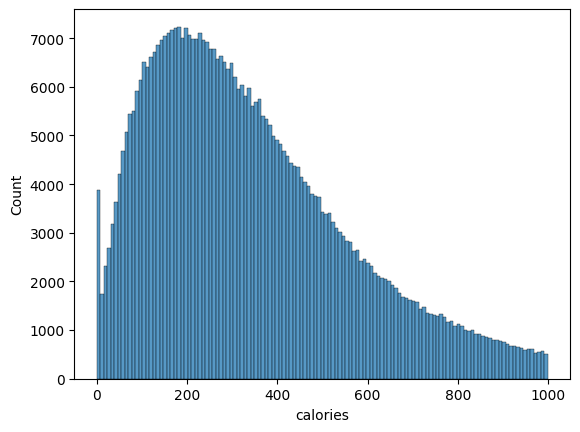

In [100]:
sns.histplot(cals["calories"])

In [98]:
cals = df[df["calories"] < 1000]
cals

,Unnamed: 0.1,Unnamed: 0,id,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,name,cooktime,preptime,totaltime,datepublished,images,recipecategory,keywords,recipeingredientquantities,aggregatedrating,calories,fatcontent,saturatedfatcontent,cholesterolcontent,sodiumcontent,carbohydratecontent,fibercontent,sugarcontent,proteincontent,new_tags,nations,check
0,0,0,96313,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",155,8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...",Grilled Garlic Cheese Grits,50M,15M,1H5M,2004-07-24T20:00:00Z,"""https://img.sndimg.com/food/image/upload/w_55...",Grains,"c(""Cheese"", ""Low Cholesterol"", ""Brunch"", ""Refr...","c(""4"", ""1"", ""1"", ""4"", ""1 -2"", ""1"")",5.0,144.8,6.7,3.3,14.9,382.7,15.7,0.9,0.2,5.0,"['time-to-make', 'course', 'main-ingredient', ...",[],False
1,1,1,232037,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",366,4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}",Simple Shrimp and Andouille Jambalaya,25M,20M,45M,2007-06-03T22:51:00Z,character(0),One Dish Meal,"c(""Pork"", ""Meat"", ""< 60 Mins"", ""Easy"")","c(""1"", ""1"", ""5"", ""1"", NA, NA, ""1"", ""3/4"", ""1 1...",5.0,756.5,28.9,9.0,191.8,2094.9,82.3,3.9,9.7,39.2,"['60-minutes-or-less', 'time-to-make', 'course...",[],False
2,2,2,41090,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",807,1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg...",black-and-white bean salad,NaN,5M,5M,2002-09-24T22:53:00Z,character(0),Black Beans,"c(""Beans"", ""Vegan"", ""Potluck"", ""Spring"", ""Summ...","c(""1"", ""1"", ""1"", ""1"", ""1"", ""1"", ""2"", ""1/8"", ""1...",4.5,159.0,1.6,0.3,0.0,318.3,28.3,8.3,2.1,9.1,"['15-minutes-or-less', 'time-to-make', 'course...","[north-american, american]",False
3,3,3,60656,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",244,4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}",Crock Pot Italian Zucchini,6H,10M,6H10M,2003-04-22T20:07:00Z,character(0),Vegetable,"c(""Winter"", ""Weeknight"", ""Beginner Cook"", ""Easy"")","c(""2"", ""2"", ""2 -3"", ""1"", ""4"", ""1"", ""2"", ""1"", NA)",4.0,47.1,0.4,0.1,0.0,19.1,10.4,2.7,4.6,2.6,"['weeknight', 'time-to-make', 'course', 'main-...",[],False
4,4,4,232047,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",358,8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},Beef Stew With Dried Cherries,2H,45M,2H45M,2007-06-03T23:06:00Z,character(0),Stew,"c(""Meat"", ""< 4 Hours"", ""Easy"")","c(""3"", ""3"", ""1"", ""1/2"", ""1/2"", ""1/2"", ""1"", ""3""...",NaN,691.1,45.8,17.7,177.1,503.6,14.4,1.6,6.8,48.2,"['time-to-make', 'course', 'main-ingredient', ...",[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494958,494958,494958,276465,"The orange zest makes for a flavorful, not ove...","['unbleached flour', 'baking soda', 'butter', ...","[""2 1/2 cups unbleached flour"",""2 teaspo...",83,8,['Sift about 2 cups of flour onto a piece of w...,"['30-minutes-or-less', 'time-to-make', 'course...","{'breakfast', 'bread'}",Blackberry Orange Scones,12M,15M,27M,2008-01-0

In [10]:
searching_df

,Unnamed: 0.1,Unnamed: 0,id,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,name,cooktime,preptime,totaltime,datepublished,images,recipecategory,keywords,recipeingredientquantities,aggregatedrating,calories,fatcontent,saturatedfatcontent,cholesterolcontent,sodiumcontent,carbohydratecontent,fibercontent,sugarcontent,proteincontent,new_tags,nations
30,30,30,232111,"Food and Wine Magazine, June /07 edition. ""The...","['bacon', 'ground pork', 'garlic clove', 'thym...","[""1/2 cup finely chopped bacon"",""1 1/2 lbs...",435,4,"['In a skillet, cook the bacon over moderate h...","['bacon', '60-minutes-or-less', 'time-to-make'...","{'pork', 'dinner'}","Double Pork, Double Cheese Burgers",15,20,35,2007-06-04T20:33:00Z,character(0),Pork,"c(""Cheese"", ""Meat"", ""< 60 Mins"", ""Easy"")","c(""1/2"", ""1 1/2"", ""1"", ""2"", ""1"", ""1/2"", ""4"", N...",NaN,884.4,57.6,26.5,216.6,1329.7,28.6,2.7,6.8,60.6,"['bacon', '60-minutes-or-less', 'time-to-make'...",[]
1081,1081,1081,311721,A sophisticated Turkey Burger. The flavours o...,"['onion', 'garlic clove', 'butter', 'ground tu...","[""1 small onion, chopped finely "",""1 ...",1069,1,['Sautee onions in pan with butter over med-lo...,"['30-minutes-or-less', 'time-to-make', 'course...",{'dinner'},Mango Chutney and Havarti Turkey Burgers,15,15,30,2008-07-03T00:41:00Z,"""https://img.sndimg.com/food/image/upload/w_55...",Poultry,"c(""Meat"", ""Savory"", ""< 30 Mins"")","c(""1"", ""1"", ""2"", ""1 1/2"", ""1/2"", ""1/2"", ""1"", ""...",NaN,182.7,8.0,2.8,67.5,315.6,14.0,0.9,1.5,12.9,"['30-minutes-or-less', 'time-to-make', 'course...",[north-american]
1571,1571,1571,297846,Another great sounding burger from Favorite Br...,"['ground turkey', 'french%27s french fried oni...","[""1 lb ground turkey"",""1 1/3 cups Fre...",195,4,"['In a large bowl combine the ground turkey, o...","['30-minutes-or-less', 'time-to-make', 'course...",{'dinner'},Asian Turkey Burgers,10,10,20,2008-04-10T23:48:00Z,"""https://img.sndimg.com/food/image/upload/w_55...",Poultry,"c(""Meat"", ""Potluck"", ""Camping"", ""Broil/Grill"",...","c(""1"", ""1 1/3"", ""1"", ""1/2"", ""1/4"", ""3"", ""1"", ""...",4.0,348.7,12.1,3.2,124.8,434.4,30.2,1.7,4.0,29.1,"['30-minutes-or-less', 'time-to-make', 'course...",[]
1751,1751,1751,471902,A Ground beef mixture that is spread on both h...,"['ground chuck', 'egg', 'yellow mustard', 'oni...","[""1 lb ground chuck"",""1 egg, large ...",152,8,"['Mix the ingredients in a bowl; ""moosh"" by ha...","['15-minutes-or-less', 'time-to-make', 'course...",{'snack'},Dad's Half-Hamburgers,3,10,13,2012-01-13T16:23:00Z,character(0),Meat,"c(""Kid Friendly"", ""Broil/Grill"", ""< 15 Mins"", ...","c(""1"", ""1"", ""3/4"", ""1 1/2"", ""1/8"", ""1/8"", ""12"")",5.0,334.6,14.0,4.8,62.4,651.5,33.4,2.2,4.3,17.8,"['15-minutes-or-less', 'time-to-make', 'course...",[]
2070,2070,2070,223246,A healthier alternative to the usual burger. B...,"['tuna in water', 'wheat germ', 'egg', 'onion'...","[""2 (6 ounce) cans tuna in water"",""3/4 cu...",251,4,['Drain and flake the tuna into a large bowl.'...,"['30-minutes-or-less', 'time-to-make', 'course...","{'healthy', 'dinner'}",Tuna Burgers,10,15,25,2007-04-17T22:52:00Z,character(0),Tuna,"c(""Healthy"", ""< 30 Mins"")","c(""2"", ""3/4"", ""1"", ""1/2"", ""1"", ""1/4"", ""1/2"", ""...",NaN,364.2,12.0,2.5,90.4,847.0,33.0,4.9,3.7,32.1,"['30-minutes-or-less', 'time-to-make', 'course...","[north-american, american]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493911,493911,493911,343301,Summertime is the perfect time for outdoor coo...,"['egg', 'garlic clove', 'onion', 'all purpose ...","[""1 large egg, beaten "",""1 garlic c...",179,4,['Whisk first 6 ingredients in stainless steel...,"['30-minutes-or-less', 'time-to-make', 'course...",{'dinner'},Victorian Epicure Greek Style Burgers,10,15,25,2008-12-13T23:35:00Z,character(0),< 30 Mins,NaN,"c(""1"", ""1"", ""1

### quick search

In [11]:
quick = "x"

In [12]:
def quick_search(df):
    if quick != "x":
        filtered = df[df["recipecategory"] == quick]
        return filtered
    return df

In [13]:
quick_df = quick_search(df)
quick_df

,Unnamed: 0.1,Unnamed: 0,id,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,name,cooktime,preptime,totaltime,datepublished,images,recipecategory,keywords,recipeingredientquantities,aggregatedrating,calories,fatcontent,saturatedfatcontent,cholesterolcontent,sodiumcontent,carbohydratecontent,fibercontent,sugarcontent,proteincontent,new_tags,nations
0,0,0,96313,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",155,8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...",Grilled Garlic Cheese Grits,50M,15M,1H5M,2004-07-24T20:00:00Z,"""https://img.sndimg.com/food/image/upload/w_55...",Grains,"c(""Cheese"", ""Low Cholesterol"", ""Brunch"", ""Refr...","c(""4"", ""1"", ""1"", ""4"", ""1 -2"", ""1"")",5.0,144.8,6.7,3.3,14.9,382.7,15.7,0.9,0.2,5.0,"['time-to-make', 'course', 'main-ingredient', ...",[]
1,1,1,232037,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",366,4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}",Simple Shrimp and Andouille Jambalaya,25M,20M,45M,2007-06-03T22:51:00Z,character(0),One Dish Meal,"c(""Pork"", ""Meat"", ""< 60 Mins"", ""Easy"")","c(""1"", ""1"", ""5"", ""1"", NA, NA, ""1"", ""3/4"", ""1 1...",5.0,756.5,28.9,9.0,191.8,2094.9,82.3,3.9,9.7,39.2,"['60-minutes-or-less', 'time-to-make', 'course...",[]
2,2,2,41090,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",807,1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg...",black-and-white bean salad,NaN,5M,5M,2002-09-24T22:53:00Z,character(0),Black Beans,"c(""Beans"", ""Vegan"", ""Potluck"", ""Spring"", ""Summ...","c(""1"", ""1"", ""1"", ""1"", ""1"", ""1"", ""2"", ""1/8"", ""1...",4.5,159.0,1.6,0.3,0.0,318.3,28.3,8.3,2.1,9.1,"['15-minutes-or-less', 'time-to-make', 'course...","[north-american, american]"
3,3,3,60656,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",244,4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}",Crock Pot Italian Zucchini,6H,10M,6H10M,2003-04-22T20:07:00Z,character(0),Vegetable,"c(""Winter"", ""Weeknight"", ""Beginner Cook"", ""Easy"")","c(""2"", ""2"", ""2 -3"", ""1"", ""4"", ""1"", ""2"", ""1"", NA)",4.0,47.1,0.4,0.1,0.0,19.1,10.4,2.7,4.6,2.6,"['weeknight', 'time-to-make', 'course', 'main-...",[]
4,4,4,232047,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",358,8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},Beef Stew With Dried Cherries,2H,45M,2H45M,2007-06-03T23:06:00Z,character(0),Stew,"c(""Meat"", ""< 4 Hours"", ""Easy"")","c(""3"", ""3"", ""1"", ""1/2"", ""1/2"", ""1/2"", ""1"", ""3""...",NaN,691.1,45.8,17.7,177.1,503.6,14.4,1.6,6.8,48.2,"['time-to-make', 'course', 'main-ingredient', ...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494958,494958,494958,276465,"The orange zest makes for a flavorful, not ove...","['unbleached flour', 'baking soda', 'butter', ...","[""2 1/2 cups unbleached flour"",""2 teaspo...",83,8,['Sift about 2 cups of flour onto a piece of w...,"['30-minutes-or-less', 'time-to-make', 'course...","{'breakfast', 'bread'}",Blackberry Orange Scones,12M,15M,27M,2008-01-04T13:06:00Z,character(0),Scones,"c(""Qui

In [14]:
df["recipecategory"].value_counts().head(50)

recipecategory
Dessert             61573
Lunch/Snacks        32448
One Dish Meal       31280
Vegetable           26224
Breakfast           20897
Chicken             13072
Meat                12560
Pork                12282
Breads              11766
Chicken Breast      11201
Potato              10461
Sauces              10427
Beverages           10290
Quick Breads         9968
< 60 Mins            8503
Cheese               8188
< 30 Mins            7853
Pie                  7743
Bar Cookie           7016
Drop Cookies         6374
Low Protein          6295
Stew                 5655
Beans                5300
Candy                5214
Yeast Breads         5011
< 15 Mins            4847
Frozen Desserts      4791
Spreads              4689
< 4 Hours            4288
Salad Dressings      4025
Cheesecake           3899
Poultry              3766
Low Cholesterol      3682
European             3572
Very Low Carbs       3342
Smoothies            3326
Steak                3130
Onions               30

### word search

In [54]:
searched_word = "burger"
def word_search(row):
    matches = [(pd.notnull(item) and searched_word.lower() in str(item).lower()) for item in row]
    return any(matches)

filtered = df.copy()
filtered = filtered[filtered.apply(word_search, axis=1)]
filtered

NameError: name 'array' is not defined

### nationality

In [ ]:
unique_nations = set()
for i in df["nations"]:
    if isinstance(i, list):
        unique_nations.update(i)
    elif isinstance(i, str):
        unique_nations.add(i)

In [ ]:
unique_nations

{'african',
 'african american',
 'african asian',
 'african australian',
 'african canadian',
 'african egyptian',
 'african ethiopian',
 'african european',
 'african jewish',
 'african kosher moroccan',
 'african moroccan',
 'african oven moroccan',
 'african spanish',
 'african vegetarian',
 'american',
 'argentine',
 'asian',
 'asian canadian',
 'asian thai',
 'australian',
 'austrian',
 'beans',
 'beans african',
 'beans asian',
 'beans european',
 'beans mexican',
 'belgian',
 'brazilian',
 'breakfast asian',
 'breakfast european',
 'british',
 'british-columbian',
 'cambodian',
 'canadian',
 'cantonese',
 'cantonese asian',
 'caribbean cuban',
 'caribbean european',
 'caribbean french',
 'caribbean german',
 'caribbean indian',
 'caribbean mexican',
 'caribbean spanish',
 'central-american',
 'cheese comfort',
 'chilean',
 'chinese',
 'chinese indian',
 'chinese jewish',
 'colombian',
 'comfort-food',
 'congolese',
 'costa-rican',
 'cuban',
 'czech',
 'danish',
 'dutch',
 'ecua

In [90]:
df["images"].unique()

array(['"https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/96/31/3/picPXXDlR.jpg"',
       'character(0)',
       'c("https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/23/20/76/picPgJ1eS.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/23/20/76/picrnXsD5.jpg")',
       ...,
       '"https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/39/24/11/pico3QJEG.jpg"',
       '"https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/49/28/61/pic3Nxzv5.jpg"',
       'c("https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/91/16/XK1RmB8sStW8Us2c1BAd-Squash-Pie.JPG", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/91/16/picpYPOWi.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,f

In [93]:
links = df["images"].unique()
pattern = r'"([^"]*)"'

# Find all matches of the regex pattern
matches = re.findall(r'"([^"]*)"', links[2])
matches

['https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/23/20/76/picPgJ1eS.jpg',
 'https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/23/20/76/picrnXsD5.jpg']

In [83]:
def seeker(df, ingredients, name, cooktime, preptime, totaltime, dish, searchword):
    filtered = df.copy()
    if ingredients != "x":
        filtered = df[df["ingredients"].str.contains(ingredients, case=False, na=False)]
    if name != "x":
        filtered.dropna(subset="name", inplace=True)
        filtered = filtered[filtered["name"].str.contains(name, case=False, na=False)]
    if cooktime != 0:
        filtered.dropna(subset="cooktime", inplace=True)
        filtered["cooktime"] = filtered["cooktime"].apply(to_minutes)
        filtered = filtered[filtered["cooktime"] <= cooktime]
    if preptime != 0:
        filtered.dropna(subset="preptime", inplace=True)
        filtered["preptime"] = filtered["preptime"].apply(to_minutes)
        filtered = filtered[filtered["preptime"] <= preptime]
    if totaltime != 0:
        filtered.dropna(subset="totaltime", inplace=True)
        filtered["totaltime"] = filtered["totaltime"].apply(to_minutes)
        filtered = filtered[filtered["totaltime"] <= totaltime]
    if dish != "All":
        filtered["check"] = filtered["tags"].apply(lambda x: dish.lower() in str(x).lower())
        filtered = filtered[filtered["check"] == True]
    if searchword != "":
        filtered["check2"] = filtered.applymap(lambda x: searchword.lower() in str(x).lower()).any(axis=1)
        filtered = filtered[filtered["check2"] == True]
    
    return filtered

In [85]:
ingredients = "x"
name = "x"
cooktime = 10
preptime = 5
totaltime = 20
dish = "dessert"
searchword = "cake"
my_df = seeker(df, ingredients, name, cooktime, preptime, totaltime, dish, searchword)
my_df

,Unnamed: 0.1,Unnamed: 0,id,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,name,cooktime,preptime,totaltime,datepublished,images,recipecategory,keywords,recipeingredientquantities,aggregatedrating,calories,fatcontent,saturatedfatcontent,cholesterolcontent,sodiumcontent,carbohydratecontent,fibercontent,sugarcontent,proteincontent,new_tags,nations,check,check2
467,467,467,383000,"From General Foods Corporation, publication ye...","['vanilla', 'milk', 'ladyfingers', 'orange jui...","[""1 (3 1/4 ounce) package jello vanilla or 1...",79,12,['Prepare Jello Pudding as directed on package...,"['weeknight', '15-minutes-or-less', 'time-to-m...","{'dessert', 'dinner'}",Coconut Pecan Torte,4,1,5,2009-07-27T15:31:00Z,character(0),Dessert,"c(""Weeknight"", ""< 15 Mins"", ""Easy"", ""Inexpensi...","c(""1"", ""1 1/2"", ""24"", ""1/4"", ""2/3"", ""2 1/4"", ""...",NaN,427.5,25.8,16.3,111.7,126.2,42.5,3.0,30.3,4.9,"['weeknight', '15-minutes-or-less', 'time-to-m...",[north-american],True,True
1917,1917,1917,25584,"Serve hot or cold over ice cream, plain cake o...","['light brown sugar', 'corn syrup', 'evaporate...","[""1 1/2 cups light brown sugar"",""2/3 cup ...",110,8,['Bring sugar and corn syrup to a full boil fo...,"['15-minutes-or-less', 'time-to-make', 'course...","{'healthy', 'dessert', 'low-fat', 'low-sodium'}",E-z Butterscotch Sauce,5,5,10,2002-04-18T10:53:00Z,character(0),Sauces,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""1 1/2"", ""2/3"", ""1"", ""1"")",NaN,286.6,3.2,1.9,12.3,61.7,64.1,0.0,46.6,2.9,"['15-minutes-or-less', 'time-to-make', 'course...",[],True,True
2124,2124,2124,151580,"""These biscuits are close to an English scone ...","['flour', 'cinnamon', 'baking powder', 'salt',...","[""2 cups flour"",""1 teaspoon cinnamon...",101,8,"['Preheat oven to 425°F.', 'Sift the flour, ci...","['15-minutes-or-less', 'time-to-make', 'course...","{'dessert', 'breakfast', 'dinner', 'english'}",Cinnamon Shortcakes,10,5,15,2006-01-13T22:12:00Z,character(0),Breakfast,"c(""Dessert"", ""European"", ""Brunch"", ""< 15 Mins""...","c(""2"", ""1"", ""1"", ""1/2"", ""1/2"", ""5"", ""1"", ""1/4""...",NaN,295.9,12.8,7.7,58.0,376.8,41.7,1.8,13.8,4.7,"['15-minutes-or-less', 'time-to-make', 'course...","[european, english]",True,True
2146,2146,2146,107569,This is another cake mix yummy. Jell-o cookies...,"['jello gelatin', 'vegetable oil', 'egg', 'yel...","[""1 (3 ounce) package Jello gelatin, any f...",798,1,"['Preheat oven to 350 degrees.', 'In a large b...","['15-minutes-or-less', 'time-to-make', 'course...","{'cookie', 'dessert'}",Jell-O Cookies,8,5,13,2005-01-04T20:01:00Z,"""https://img.sndimg.com/food/image/upload/w_55...",Gelatin,"c(""Dessert"", ""Cookie & Brownie"", ""Kid Friendly...","c(""1"", ""2/3"", ""1"", ""1"")",4.5,108.9,5.8,0.8,5.5,107.6,13.4,0.2,8.3,1.0,"['15-minutes-or-less', 'time-to-make', 'course...",[],True,True
2227,2227,2227,213671,Healthy,"['egg whites', 'all-bran cereal', 'cinnamon', ...","[""4 egg whites"",""1/2 cup all-bran ce...",163,1,"['Place the All Bran, egg, cinnamon and Splend...","['15-minutes-or-less', 'time-to-make', 'course...","{'diabetic', 'low-calorie', 'dessert', 'health...",All Bran Pancake,10,5,15,2007-02-24T21:39:00Z,character(0),Breakfast,"c(""Dessert"", ""Low Cholesterol"", ""Healthy"", ""Fr...","c(""4"", ""1/2"", NA, NA, NA)",4.5,149.2,1.7,0.2,0.0,299.7,24.0,9.1,5.8,18.5,"['15-minutes-or-less', 'time-to-make', 'course...",[],True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493168,493168,493168,348583,This is from Family Fun's Nov. 2008 issue. I ...,"['butternut squash', 'maple syrup', 'light cre...","[""2 1/2 lbs butternut squash"",""1/2 cup ...",1457,1,"['Cook butternut. Using a potato masher, mash...","['15-minutes-or-less', 'time-to-make', 'course...","{'low-calorie', 'low-sodium', 'vegetarian', 'l...",Pumpkin Pie-Sicles (Popsicles),6,5,11,2009-01